## Risk Adjusted Returns



Firstly we import pandas and then use it to import the csv file containing all of the data. We can then simply reference that data to output it

In [42]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
prices

BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892

With this data we are able to simply get the percent change from the previous row

In [43]:
returns = prices.pct_change()
returns

BLUE    ORANGE
0        NaN       NaN
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

The if we want to plot the percentage change on a line graph we can do `returns.plot()` which is the same as running `returns.plot.line()`

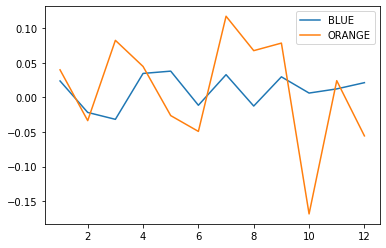

In [44]:
returns.plot()

As you can see from the percantage change table there is a column stating N/A as there had not yet been enough data to complete the calculation, we can remove this row of non applicable data usign `returns.dropna()`

In [45]:
returns = returns.dropna()
returns

BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

We are then able to simply get the Standard Deviation of the returns using `returns.std()`

In [46]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

We are also able to calculate the volatility of the data in the following way

We calculate the volatility by doing the following

- Calulate the deviations by demeaning the results `deviations = results - results.mean()`
- Calculate the squared deviations `squared_devations = deviations^2`
- We then can retrieve the variance by taking the mean of the squared deviations `variance = squared_devations.mean()`
- The volatility is then the square root of the variance \sqrt{variance}
$$ \sigma = \sqrt{E((R - E(R)))^{2})} $$

In [47]:
import numpy as np

deviations = returns - returns.mean()
squared_deviations = deviations**2
variance = squared_deviations.mean()

volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Annualised volatility is calculated by scaling over a 12 month period

In [49]:
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

Importing some real data instead of the sample data previously

In [50]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)

We can then display the head of this data

In [51]:
returns.head()

<= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
192607   NaN  -0.43    1.52   2.68  -0.57   0.59   1.60   1.47   3.33  -1.45   
192608   NaN   3.90    3.04   2.09   3.84   3.59   3.71   1.61   2.33   5.12   
192609   NaN  -1.08   -0.54   0.16  -0.48  -1.40   0.00  -0.50  -0.09   0.93   
192610   NaN  -3.32   -3.52  -3.06  -3.29  -4.10  -2.89  -3.36  -2.95  -4.84   
192611   NaN  -0.46    3.82   3.09  -0.55   2.18   3.41   3.39   3.16  -0.78   

        Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10  
192607   0.29  -0.15   1.33   1.24   1.98   1.55   1.38   3.38   3.29  
192608   2.59   4.03   3.15   2.72   4.72   1.60   1.63   0.98   3.70  
192609  -1.87  -2.27  -0.53   0.07  -0.07  -1.64   0.64  -0.86   0.67  
192610  -1.77  -3.36  -4.83  -2.98  -2.80  -3.45  -3.27  -3.47  -2.43  
192611  -0.32  -0.29   4.65   3.24   3.57   3.82   2.95   3.61   2.70

We only want the lower and upper deciles so we can select the columns in the following way

In [52]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]
returns.head()

Lo 10  Hi 10
192607  -1.45   3.29
192608   5.12   3.70
192609   0.93   0.67
192610  -4.84  -2.43
192611  -0.78   2.70

Display them efficiently

In [53]:
returns = returns/100
returns.head()

Lo 10   Hi 10
192607 -0.0145  0.0329
192608  0.0512  0.0370
192609  0.0093  0.0067
192610 -0.0484 -0.0243
192611 -0.0078  0.0270

Rename the columns as such:


In [54]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

Plot the real data on a line chart in the following way

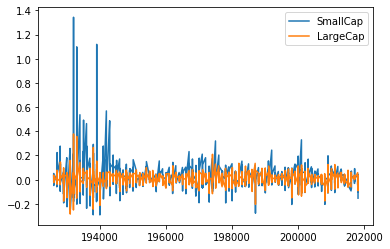

In [56]:
returns.plot()

We can then get the Standard deviation same as above

In [58]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

Create the annualised volatility again

In [60]:
annualised_vol = returns.std()*np.sqrt(12)
annualised_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

We can also calculate the montly returns of the data. `.shape` is used to get the number of rows and columns in a dataset in the format (rows, columns). Knowing this we can retrieve the number of rows in the table using `returns.shape[0]`

In [62]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months)-1
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

Once we have the monthly returns we can then work out the annualised returns

In [63]:
annualised_return = (return_per_month+1)**12 -1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Alternatively we could use the following for the same result

In [65]:
annualised_return =(returns+1).prod()**(12/n_months)-1
annualised_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Using this information we can calulate a return on risk ratio, you can see LargeCap gave greater return per unit of volatility

In [66]:
annualised_return/annualised_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

We can also use the Sharpe ratio calculate the annualised return over the risk free rate and can see that the Small Cap actually provided better returns over the standard risk free rate

In [67]:
riskfree_rate = 0.03
excess_return = annualised_return - riskfree_rate
sharpe_ratio = excess_return / annualised_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64